# K-Means Clustering Algorithm

K-Means Clusterin is an unsupervised machine learning algorithm used for clustering data into $ k $ groups based on feature similarity. K-Means Clustering is a form of **unsupervised learning**, which means that it assigns labels that are *not predefined* to the data.

---

## Step-by-Step Algorithm

1. **Choose the Number of Clusters ($ k $)**:
   - Decide how many clusters ($ k $) you want to divide the data into. 
  
2. **Initialize Cluster Centroids**:
   - Randomly select $ k $ data points from the dataset. These are the initial cluster centroids.

3. **Assign Points to the Nearest Centroid**:
   - For each data point in the dataset, compute the distance to each cluster centroid using a distance metric and assign each data point to the cluster whose centroid is closest.
     - For the distance metric, K-Means can use:
        - Euclidean Distance: $ \sqrt{\sum (x_i - y_i)^2} $
        - Manhattan Distance: $ \sum |x_i - y_i| $

4. **Recompute Cluster Centroids**:
   - For each cluster, calculate the new centroid by taking the mean of all the points assigned to that cluster:
     $$
     \text{Centroid}_k = \frac{1}{n_k} \sum_{i=1}^{n_k} \text{Point}_i
     $$
     where $ n_k $ is the number of points in cluster $ k $.

5. **Repeat Until Convergence**:
   - Reassign points to clusters based on the updated centroids.
   - Recompute the centroids for the new clusters.
   - Repeat steps 3 and 4 until the centroid centers converge.

![K-Means Diagram](k-means-diagram.png)

(Image from u/DineshPiyasamara on reddit.com)

---

## Advantages of K-Means

- Simple and easy to implement.
- Works well with large datasets.
- Computational Complexity: $ O(n \cdot k \cdot t) $, where $ n $ is the number of points, $ k $ is the number of clusters, and $ t $ is the number of iterations — *this is pretty fast*

---

## Limitations

- Requires $ k $ to be specified in advance.
- Sensitive to the initial placement of centroids (can lead to suboptimal solutions).
- Assumes clusters are spherical and equally sized, which may not hold for all datasets.

---

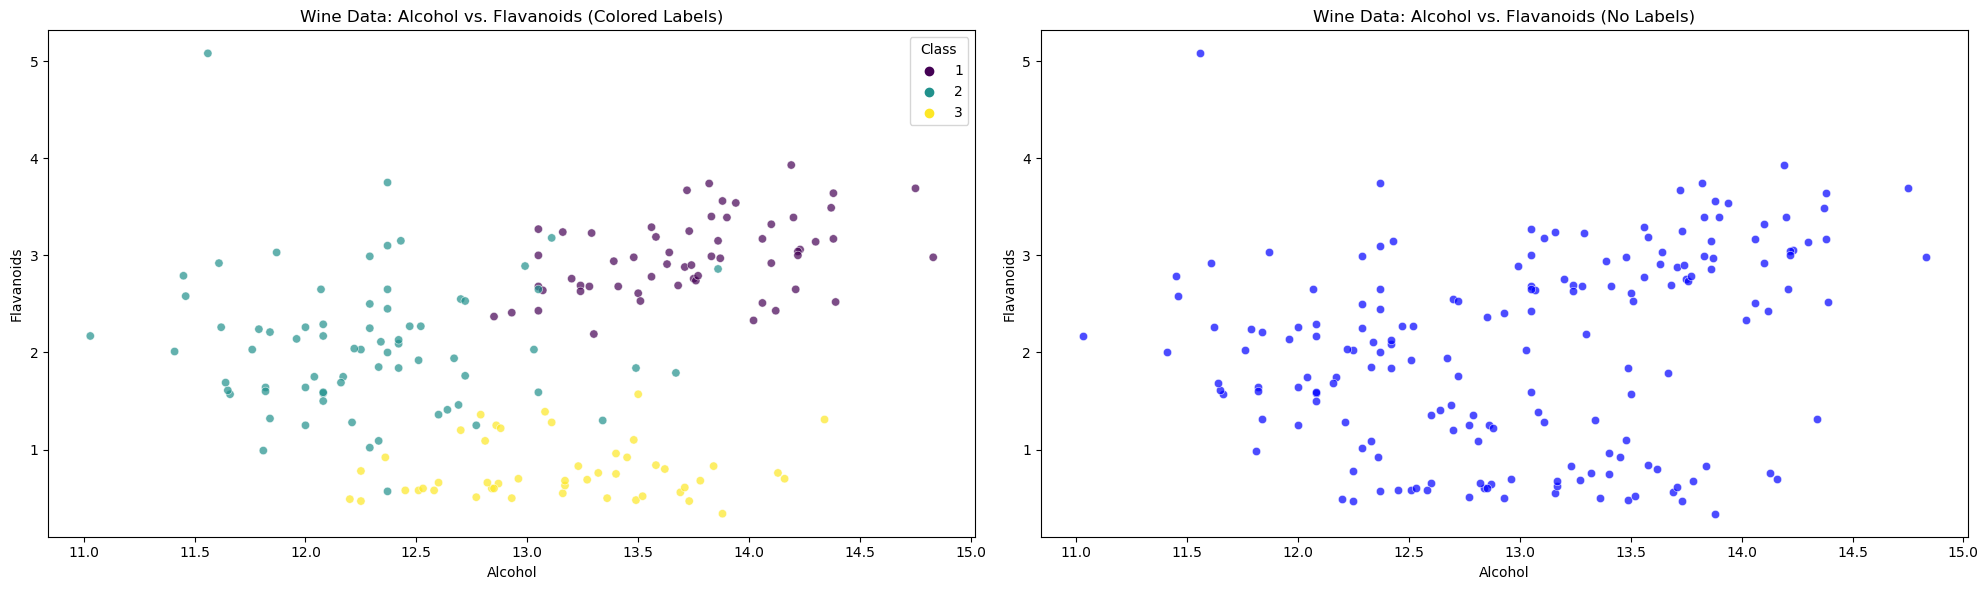

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot with colored labels
sns.scatterplot(data=df, x='Alcohol', y='Flavanoids', hue='Wine', palette='viridis', alpha=0.7, ax=axes[0])
axes[0].set_title('Wine Data: Alcohol vs. Flavanoids (Colored Labels)')
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Flavanoids')
axes[0].legend(title='Class', loc='upper right')

# Plot without colored labels
sns.scatterplot(data=df, x='Alcohol', y='Flavanoids', color='blue', alpha=0.7, ax=axes[1])
axes[1].set_title('Wine Data: Alcohol vs. Flavanoids (No Labels)')
axes[1].set_xlabel('Alcohol')
axes[1].set_ylabel('Flavanoids')

# Show the plots
plt.tight_layout()
plt.show()
